In [19]:
import numpy as np
import matplotlib.pyplot as plt

import theano
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

In [2]:
# 인코딩 될 representation의 크기
encoding_dim = 32

# 입력 플레이스 홀더
input_img = Input(shape=(784, ))
input_img

/input_1

In [3]:
# 인코딩된 입력
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded

Elemwise{mul,no_inplace}.0

In [4]:
# 입력의 손실있는 복구 (lossy reconstruction)
decoded = Dense(784, activation = 'sigmoid')(encoded)
decoded

sigmoid.0

In [5]:
# 입력과 복구한 것을 매핑하기
autoencoder = Model(input_img, decoded)
autoencoder

In [6]:
# 분리된 인코더 모델???
encoder = Model(input_img, encoded)
encoder

In [7]:
# 분리된 디코더 모델???

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder_layer

In [8]:
decoder = Model(encoded_input, decoder_layer(encoded_input))
decoder

In [9]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
# The loss function is binary crossentropy
# Use adadelta to fit the model

In [10]:
(x_train, _), (x_test, _) = mnist.load_data()
x_test
# As we are interested in encoding & decoding, remove labels.

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [12]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [14]:
# autoencoder 2 epoch 동안 훈련시키기
# 50 epoch는 오래 걸림
# batch 256도 오래 걸림
autoencoder.fit(x_train, x_train,
               epochs=2,
               batch_size=16384,
               shuffle=True,
               validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 11481s 191ms/step - loss: 0.3584 - val_loss: 0.2703
Epoch 2/2
60000/60000 [==============================] - 11438s 191ms/step - loss: 0.2623 - val_loss: 0.2507


In [15]:
# testset encoding
encoded_imgs = encoder.predict(x_test)
encoded_imgs

array([[ 0.        ,  1.6880031 ,  4.153972  , ...,  0.94133604,
         6.487895  ,  0.        ],
       [ 0.        ,  2.8161626 ,  4.5438113 , ...,  1.6844472 ,
         6.7687845 ,  0.09580355],
       [ 0.        ,  1.2276953 ,  3.2189276 , ...,  2.411866  ,
         4.5371075 ,  0.        ],
       ...,
       [ 0.        ,  3.5854738 ,  7.057228  , ...,  2.9679632 ,
        12.107256  ,  0.        ],
       [ 0.        ,  3.1314523 ,  5.432645  , ...,  3.5056677 ,
         8.371349  ,  0.        ],
       [ 0.        ,  2.52547   ,  7.8698773 , ...,  2.7949836 ,
        10.219065  ,  0.        ]], dtype=float32)

In [16]:
# testset decoding
decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs

array([[6.0807457e-03, 6.9916155e-03, 6.3308910e-03, ..., 6.5278299e-03,
        6.6111404e-03, 5.5751493e-03],
       [2.6968850e-03, 2.4041876e-03, 2.8117886e-03, ..., 3.3759503e-03,
        1.8987795e-03, 2.4411252e-03],
       [1.4668986e-02, 1.0817439e-02, 1.3307007e-02, ..., 1.7941933e-02,
        1.5956633e-02, 8.3451020e-03],
       ...,
       [9.1301372e-05, 7.1449060e-05, 6.2461811e-05, ..., 7.7737277e-05,
        8.4372768e-05, 5.1426963e-05],
       [5.7312031e-04, 4.8162290e-04, 5.2065635e-04, ..., 7.6845381e-04,
        6.0711423e-04, 3.4412101e-04],
       [3.4269827e-04, 2.3037447e-04, 2.7129121e-04, ..., 2.3082214e-04,
        1.2559950e-04, 5.0800276e-04]], dtype=float32)

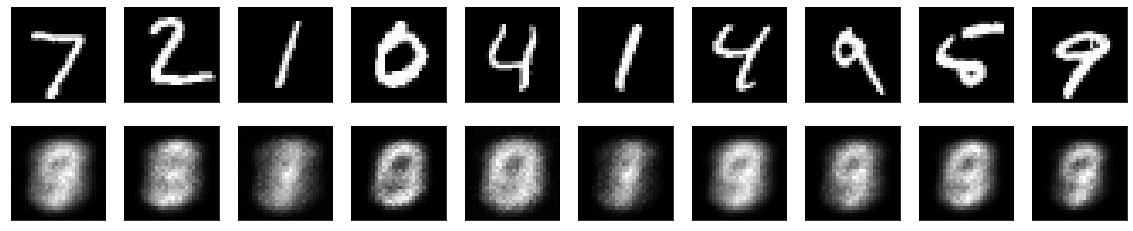

In [18]:
n = 10 # number of numbers to show
plt.figure(figsize= (20, 4))
for i in range(n):
    # 원본 이미지
    ax=plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # 재구성 이미지
    ax=plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Adding a sparsity constraint on the encoded representations

In [25]:
# L1 activity regularizer를 Dense layer에 추가
encoded = Dense(encoding_dim, activation='relu',
               activity_regularizer=regularizers.l1(10e-5))(input_img)

decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder=Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train, x_train,
               epochs=1,
               batch_size=60000,
               shuffle=True,
               validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
49152/60000 [=======================>......] - ETA: 27:06 - loss: 6.1263  

# Reference
$\blacktriangleright$ Keras for Everyone \
https://keraskorea.github.io/posts/2018-10-23-keras_autoencoder/